In [1]:
import math

In [2]:
def pedir_polinomio():
    f_x = []
    n = int(input("Introduce el grado del polinomio: "))
    for i in range(0,n+1):
        print("Ingresa el coeficiente para el x^", n - i,": ")
        f_x.append(float(input()))
    return f_x 

In [3]:
def derivada(f_x):
  n = len(f_x)-1
  grado = n
  f_x_derivada = []
  for i in range(0,grado):
    f_x_derivada.append(f_x[i]*(n))
    n -= 1
  return f_x_derivada

In [4]:
def horner(f_x,n,x):
  n_1, resultado = n-1, 0
  for i in range(0,n):
    if i == n-1:
      resultado += f_x[i]
    else: 
      resultado += (f_x[i]*(pow(x,n_1)))
    n_1 -= 1
  return resultado

In [5]:
def nr(f_x,n,x1,cifras = 5):
  ernp = 1
  tolerancia = 0.5*10**(2-cifras)
  iteraciones = 0
  x = 1
  lista_raices = []

  print("f(x): "+str(f_x))
  f_x_derivada = derivada(f_x)
  print("f'(x): " + str(f_x_derivada))

  while abs(ernp) >= tolerancia:
     x1 = x
     f_x_evaluada = horner(f_x,n,x1)
     derivada_evaluada = horner(f_x_derivada,n-1,x1)
     raiz = x1 - (f_x_evaluada/derivada_evaluada)
     ernp = ((raiz - x)/raiz)*100
     x = raiz
     iteraciones += 1
     lista_raices.append(raiz)

  return lista_raices


In [6]:
f_x = []
f_x = pedir_polinomio()
f_x

Ingresa el coeficiente para el x^ 3 : 
Ingresa el coeficiente para el x^ 2 : 
Ingresa el coeficiente para el x^ 1 : 
Ingresa el coeficiente para el x^ 0 : 


[5.0, 4.0, 3.0, 2.0]

In [7]:
lista_raices = nr(f_x,len(f_x),1,cifras = 5)
lista_raices

f(x): [5.0, 4.0, 3.0, 2.0]
f'(x): [15.0, 8.0, 3.0]


[0.46153846153846156,
 -0.016664364958799416,
 -0.6962868341218568,
 -0.7308573145220622,
 -0.7293263122174456,
 -0.7293231430250081]

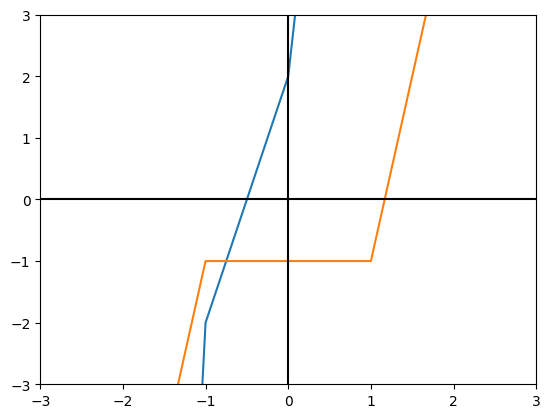

In [8]:
from matplotlib import pyplot

def f1(x):
    return 5*(x**3) + 4*(x**2) + 3*x + 2

def f2(x):
    return (x**3)-x-1

x = range(-10, 15)

pyplot.plot(x, [f1(i) for i in x])
pyplot.plot(x, [f2(i) for i in x])

pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")

pyplot.xlim(-3, 3)
pyplot.ylim(-3, 3)

pyplot.savefig("output.png")

pyplot.show()

In [1]:
from sympy import symbols, simplify, divisors

def algoritmo_de_newton(x, y):
    n = len(x)
    
    if n != 3 or len(y) != 3:
        raise ValueError("Se esperan exactamente tres puntos (x, y).")

    # Símbolos
    t = symbols('t')

    # Polinomio interpolante
    P = y[0] + (y[1] - y[0]) / (x[1] - x[0]) * (t - x[0]) + (y[2] - y[1]) / (x[2] - x[1]) * (t - x[1]) * (t - x[0])

    # Simplificar el polinomio
    P_simplificado = simplify(P)

    return P_simplificado

# Ejemplo de uso
x_valores = [1, 2, 3]
y_valores = [2, 1, 3]

polinomio_reducido = algoritmo_de_newton(x_valores, y_valores)

# Imprimir el polinomio reducido
print("Polinomio Reducido:")
print(polinomio_reducido)


Polinomio Reducido:
2.0*t**2 - 7.0*t + 7.0


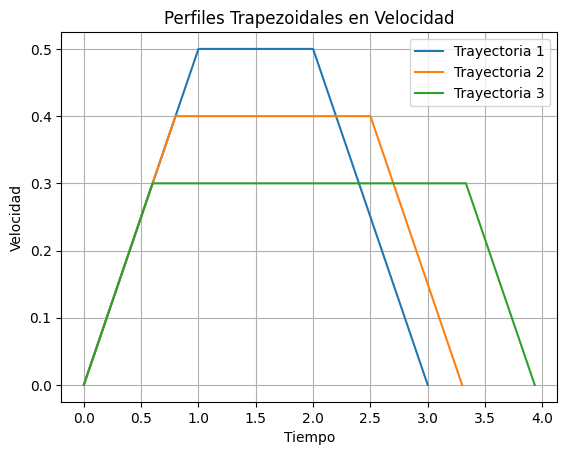

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def perfil_trapezoidal_en_velocidad(velocidad_max, aceleracion_max, tiempo_total):
    tiempo_aceleracion = velocidad_max / aceleracion_max
    distancia_aceleracion = 0.5 * aceleracion_max * tiempo_aceleracion**2

    if distancia_aceleracion * 2 >= 1.0:
        raise ValueError("La distancia total es mayor o igual a la unidad.")

    tiempo_constante = (1 - distancia_aceleracion * 2) / velocidad_max
    tiempo_total = tiempo_aceleracion * 2 + tiempo_constante

    t_aceleracion = np.linspace(0, tiempo_aceleracion, 100)
    t_constante = np.linspace(tiempo_aceleracion, tiempo_aceleracion + tiempo_constante, 100)
    t_desaceleracion = np.linspace(tiempo_aceleracion + tiempo_constante, tiempo_total, 100)

    v_aceleracion = aceleracion_max * t_aceleracion
    v_constante = np.full_like(t_constante, velocidad_max)
    v_desaceleracion = velocidad_max - aceleracion_max * (t_desaceleracion - (tiempo_aceleracion + tiempo_constante))

    tiempo = np.concatenate((t_aceleracion, t_constante, t_desaceleracion))
    velocidad = np.concatenate((v_aceleracion, v_constante, v_desaceleracion))

    return tiempo, velocidad

# Parámetros
velocidad_max = 0.5  # Unidades de velocidad
aceleracion_max = 0.5  # Unidades de aceleración
tiempo_total = 4.0  # Unidades de tiempo

# Obtener trayectorias
tiempo_1, velocidad_1 = perfil_trapezoidal_en_velocidad(velocidad_max, aceleracion_max, tiempo_total)
tiempo_2, velocidad_2 = perfil_trapezoidal_en_velocidad(0.8 * velocidad_max, aceleracion_max, tiempo_total)
tiempo_3, velocidad_3 = perfil_trapezoidal_en_velocidad(0.6 * velocidad_max, aceleracion_max, tiempo_total)

# Gráficos
plt.plot(tiempo_1, velocidad_1, label='Trayectoria 1')
plt.plot(tiempo_2, velocidad_2, label='Trayectoria 2')
plt.plot(tiempo_3, velocidad_3, label='Trayectoria 3')

plt.title('Perfiles Trapezoidales en Velocidad')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()
plt.grid(True)
plt.show()
